### Reveiw Extraction and Emotion Mining

1) Extract reviews of any product from ecommerce website like amazon.

2) Perform emotion mining.


# Content Extraction

In [45]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
import re
import nltk
import os

In [3]:
link = 'https://www.amazon.in/Jabra-Definition-Hands-Free-Cancellation-Activation/product-reviews/B07FKPYLNB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [4]:
page=requests.get(link)

In [5]:
page

<Response [200]>

In [6]:
page.content

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n\n<!-- sp:feature:aui-assets -->\n<link rel="stylesheet" href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41SIz69qHYL.css,21qPwhPKAAL.css,01Vctty9pOL.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11bGSgD5pDL.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,01ZfXnjPmmL.css,01oDR3IULNL.css,31ZcpBfSgNL.css,01XPHJk60-L.css,01R0k0yxPXL.css,21xVR0NtxzL.css,11gneA3MtJL.css,21fecG8pUzL.css,01RddH8vm-L.css,01CFUgsA-YL.css,21AmhU6t0s

In [7]:
soup=bs(page.content,'html.parser')

In [8]:
print(soup.prettify())

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:feature:aui-assets -->
  <link href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41SIz69qHYL.css,21qPwhPKAAL.css,01Vctty9pOL.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11bGSgD5pDL.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,01ZfXnjPmmL.css,01oDR3IULNL.css,31ZcpBfSgNL.css,01XPHJk60-L.css,01R0k0yxPXL.css,21xVR0NtxzL.css,11gneA3MtJL.css,21fecG8pUzL.css,01RddH8vm-L.css,01CFUgsA-YL.css,21AmhU6t0s

In [9]:
names=soup.find_all('span',class_='a-profile-name')

In [10]:
names

[<span class="a-profile-name">Akash Das</span>,
 <span class="a-profile-name">Akshat Agrawal</span>,
 <span class="a-profile-name">Akash Das</span>,
 <span class="a-profile-name">CtrlAtlDel</span>,
 <span class="a-profile-name">Akshat Agrawal</span>,
 <span class="a-profile-name">Kamal</span>,
 <span class="a-profile-name">PD</span>,
 <span class="a-profile-name">Viral jain</span>,
 <span class="a-profile-name">Amazon Customer</span>,
 <span class="a-profile-name">Varun Choudhary</span>,
 <span class="a-profile-name">SS</span>,
 <span class="a-profile-name">GAURAV MARWAHA</span>]

In [11]:
len(names)

12

In [12]:
cust_name=[]
for i in range(0,len(names)):
    cust_name.append(names[i].get_text())

In [13]:
cust_name

['Akash Das',
 'Akshat Agrawal',
 'Akash Das',
 'CtrlAtlDel',
 'Akshat Agrawal',
 'Kamal',
 'PD',
 'Viral jain',
 'Amazon Customer',
 'Varun Choudhary',
 'SS',
 'GAURAV MARWAHA']

In [14]:
cust_name.pop(0)

'Akash Das'

In [15]:
cust_name

['Akshat Agrawal',
 'Akash Das',
 'CtrlAtlDel',
 'Akshat Agrawal',
 'Kamal',
 'PD',
 'Viral jain',
 'Amazon Customer',
 'Varun Choudhary',
 'SS',
 'GAURAV MARWAHA']

In [16]:
cust_name.pop(0)

'Akshat Agrawal'

In [17]:
cust_name

['Akash Das',
 'CtrlAtlDel',
 'Akshat Agrawal',
 'Kamal',
 'PD',
 'Viral jain',
 'Amazon Customer',
 'Varun Choudhary',
 'SS',
 'GAURAV MARWAHA']

In [18]:
title=soup.find_all('a',class_='review-title-content')

In [19]:
title

[<a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/RVN7WV5IUNQN7?ASIN=B07FKPYLNB">
 <span>Almost perfect for daily use...</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R1XLBWA6794PEW?ASIN=B07FKPYLNB">
 <span>Superb call quality and features.</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/RVTIG15BVU2YK?ASIN=B07FKPYLNB">
 <span>Don't buy this one. Go for Jabra 45.</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R1H86VN2EKERQS?ASIN=B07FKPYLNB">
 <span>Jabra Talk 45 Clear winner</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-ba

In [20]:
review_title=[]
for i in range(0,len(title)):
    review_title.append(title[i].get_text())
review_title

['\nAlmost perfect for daily use...\n',
 '\nSuperb call quality and features.\n',
 "\nDon't buy this one. Go for Jabra 45.\n",
 '\nJabra Talk 45 Clear winner\n',
 '\nJabra Talk 25 - Very Nice Useful BT Headset\n',
 '\nReally painful for ears Dont buy\n',
 '\nBest at this price\n',
 '\nFantastic piece from Jabra !\n',
 '\nOnly Calling BT ear phone no Music support\n',
 '\nThe brand name should be KACHRA...deserves five full trash cans instead of stars\n']

In [21]:
review_title[:]=[titles.lstrip('\n') for titles in review_title]
review_title

['Almost perfect for daily use...\n',
 'Superb call quality and features.\n',
 "Don't buy this one. Go for Jabra 45.\n",
 'Jabra Talk 45 Clear winner\n',
 'Jabra Talk 25 - Very Nice Useful BT Headset\n',
 'Really painful for ears Dont buy\n',
 'Best at this price\n',
 'Fantastic piece from Jabra !\n',
 'Only Calling BT ear phone no Music support\n',
 'The brand name should be KACHRA...deserves five full trash cans instead of stars\n']

In [22]:
review_title[:]=[titles.rstrip('\n') for titles in review_title]
review_title

['Almost perfect for daily use...',
 'Superb call quality and features.',
 "Don't buy this one. Go for Jabra 45.",
 'Jabra Talk 45 Clear winner',
 'Jabra Talk 25 - Very Nice Useful BT Headset',
 'Really painful for ears Dont buy',
 'Best at this price',
 'Fantastic piece from Jabra !',
 'Only Calling BT ear phone no Music support',
 'The brand name should be KACHRA...deserves five full trash cans instead of stars']

In [23]:
rating=soup.find_all('i',class_='review-rating')

In [24]:
rating

[<i class="a-icon a-icon-star a-star-4 review-rating" data-hook="review-star-rating-view-point"><span class="a-icon-alt">4.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-1 review-rating" data-hook="review-star-rating-view-point"><span class="a-icon-alt">1.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-4 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">4.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-1 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">1.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</sp

In [25]:
rate=[]
for i in range(0,len(rating)):
    rate.append(rating[i].get_text())
rate

['4.0 out of 5 stars',
 '1.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars',
 '1.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '1.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '3.0 out of 5 stars',
 '1.0 out of 5 stars']

In [26]:
len(rate)

12

In [27]:
rate.pop(0)

'4.0 out of 5 stars'

In [28]:
rate.pop(0)

'1.0 out of 5 stars'

In [29]:
len(rate)

10

In [30]:
review=soup.find_all("span",{"data-hook":"review-body"})

In [31]:
review

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   The sound quality is good. Some distortion is observed while listening to music when riding bike at high speeds like 70-80 kmph. Pairs easily with iPhone. Single button for multiple functions. Single press to Receive/End incoming calls, two quick press for redialing previous number. Long press for Siri. It’s struggle to wear under helmet but once you do your ride is fun filled. Sound quality during calls is crisp. Only 1 complain that it doesn’t have any battery widget in iPhone. It flashes green and blue light after pairing and during use. When battery is low it flashes red and blue light which is difficult to observe while you’re wearing. It won’t give audio warning when battery is low. Battery life is decent upto 5 hours of continuous usage listening music and using google maps at the same time also receiving calls simultaneously. Overall great product.
 </span>
 </span>,
 <span class="a-s

In [32]:
review_content=[]
for i in range(0,len(review)):
    review_content.append(review[i].get_text())
review_content

['\n\n  The sound quality is good. Some distortion is observed while listening to music when riding bike at high speeds like 70-80 kmph. Pairs easily with iPhone. Single button for multiple functions. Single press to Receive/End incoming calls, two quick press for redialing previous number. Long press for Siri. It’s struggle to wear under helmet but once you do your ride is fun filled. Sound quality during calls is crisp. Only 1 complain that it doesn’t have any battery widget in iPhone. It flashes green and blue light after pairing and during use. When battery is low it flashes red and blue light which is difficult to observe while you’re wearing. It won’t give audio warning when battery is low. Battery life is decent upto 5 hours of continuous usage listening music and using google maps at the same time also receiving calls simultaneously. Overall great product.\n\n',
 "\n\n  This is Jabra Talk 45 and not stealth. Awesome headset, great call quality at both ends and good for music. (

In [34]:
review_content[:]=[reviews.rstrip('\n\n') for reviews in review_content]
review_content

['\n\n  The sound quality is good. Some distortion is observed while listening to music when riding bike at high speeds like 70-80 kmph. Pairs easily with iPhone. Single button for multiple functions. Single press to Receive/End incoming calls, two quick press for redialing previous number. Long press for Siri. It’s struggle to wear under helmet but once you do your ride is fun filled. Sound quality during calls is crisp. Only 1 complain that it doesn’t have any battery widget in iPhone. It flashes green and blue light after pairing and during use. When battery is low it flashes red and blue light which is difficult to observe while you’re wearing. It won’t give audio warning when battery is low. Battery life is decent upto 5 hours of continuous usage listening music and using google maps at the same time also receiving calls simultaneously. Overall great product.',
 "\n\n  This is Jabra Talk 45 and not stealth. Awesome headset, great call quality at both ends and good for music. (Plea

In [35]:
review_content[:]=[reviews.lstrip('\n\n') for reviews in review_content]
review_content

['  The sound quality is good. Some distortion is observed while listening to music when riding bike at high speeds like 70-80 kmph. Pairs easily with iPhone. Single button for multiple functions. Single press to Receive/End incoming calls, two quick press for redialing previous number. Long press for Siri. It’s struggle to wear under helmet but once you do your ride is fun filled. Sound quality during calls is crisp. Only 1 complain that it doesn’t have any battery widget in iPhone. It flashes green and blue light after pairing and during use. When battery is low it flashes red and blue light which is difficult to observe while you’re wearing. It won’t give audio warning when battery is low. Battery life is decent upto 5 hours of continuous usage listening music and using google maps at the same time also receiving calls simultaneously. Overall great product.',
 "  This is Jabra Talk 45 and not stealth. Awesome headset, great call quality at both ends and good for music. (Please do no

In [36]:
len(review_content)

10

In [37]:
cust_name
review_title
rate
review_content

['  The sound quality is good. Some distortion is observed while listening to music when riding bike at high speeds like 70-80 kmph. Pairs easily with iPhone. Single button for multiple functions. Single press to Receive/End incoming calls, two quick press for redialing previous number. Long press for Siri. It’s struggle to wear under helmet but once you do your ride is fun filled. Sound quality during calls is crisp. Only 1 complain that it doesn’t have any battery widget in iPhone. It flashes green and blue light after pairing and during use. When battery is low it flashes red and blue light which is difficult to observe while you’re wearing. It won’t give audio warning when battery is low. Battery life is decent upto 5 hours of continuous usage listening music and using google maps at the same time also receiving calls simultaneously. Overall great product.',
 "  This is Jabra Talk 45 and not stealth. Awesome headset, great call quality at both ends and good for music. (Please do no

In [39]:
df=pd.DataFrame()

In [40]:
df['customer name']=cust_name

In [41]:
df

,customer name
0,Akash Das
1,CtrlAtlDel
2,Akshat Agrawal
3,Kamal
4,PD
5,Viral jain
6,Amazon Customer
7,Varun Choudhary
8,SS
9,GAURAV MARWAHA


In [42]:
df['Review Title']=review_title
df['Rating']=rate
df['Reviews']=review_content

In [43]:
df

,customer name,Review Title,Rating,Reviews
0,Akash Das,Almost perfect for daily use...,4.0 out of 5 stars,The sound quality is good. Some distortion i...
1,CtrlAtlDel,Superb call quality and features.,5.0 out of 5 stars,This is Jabra Talk 45 and not stealth. Aweso...
2,Akshat Agrawal,Don't buy this one. Go for Jabra 45.,1.0 out of 5 stars,I am using Jabra Bluetooth earphones for mor...
3,Kamal,Jabra Talk 45 Clear winner,5.0 out of 5 stars,Really amazing headset. I had to chose one f...
4,PD,Jabra Talk 25 - Very Nice Useful BT Headset,5.0 out of 5 stars,Delivered pretty fast by Cambium. It was del...
5,Viral jain,Really painful for ears Dont buy,1.0 out of 5 stars,When i tried to return the product the suppo...
6,Amazon Customer,Best at this price,5.0 out of 5 stars,I bought this for my husband.. it was suparb...
7,Varun Choudhary,Fantastic piece from Jabra !,5.0 out of 5 stars,Just unpacked the device. Seemlessly connect...
8,SS,Only Calling BT ear phone no Music support,3.0 out of 5 stars,"Only plays voice calls, No music support.Thi..."
9,GAURAV MARWAHA,The brand name should be KACHRA...deserves fiv...,1.0 out of 5 stars,Will keep it short & sweet to save everyone'...


# Emotion Mining

In [47]:
#Extracting reviews for bluetooth mono headset
bluetooth_reviews = []
for i in range(1,30):
    blumono = []
    url = "https://www.amazon.in/Jabra-Definition-Hands-Free-Cancellation-Activation/product-reviews/B07FKPYLNB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content, "html.parser")
    reviews = soup.find_all("span", {"data-hook":"review-body"})
    for i in range(len(reviews)):
        blumono.append(reviews[i].text)
    bluetooth_reviews = bluetooth_reviews+blumono

In [48]:
#saving extracted data
with open ("blumono.txt", "w", encoding = 'utf8') as output:
    output.write(str(bluetooth_reviews))

In [49]:
#Joining all the reviews into single paragraph
bluetooth_rev_str = " ".join(bluetooth_reviews)

In [50]:
bluetooth_rev_str

"\n\n  The sound quality is good. Some distortion is observed while listening to music when riding bike at high speeds like 70-80 kmph. Pairs easily with iPhone. Single button for multiple functions. Single press to Receive/End incoming calls, two quick press for redialing previous number. Long press for Siri. It’s struggle to wear under helmet but once you do your ride is fun filled. Sound quality during calls is crisp. Only 1 complain that it doesn’t have any battery widget in iPhone. It flashes green and blue light after pairing and during use. When battery is low it flashes red and blue light which is difficult to observe while you’re wearing. It won’t give audio warning when battery is low. Battery life is decent upto 5 hours of continuous usage listening music and using google maps at the same time also receiving calls simultaneously. Overall great product.\n\n \n\n  This is Jabra Talk 45 and not stealth. Awesome headset, great call quality at both ends and good for music. (Pleas

In [51]:
#Removing unwanted symbols
bluetooth_rev_str = re.sub("[^A-Za-z" "]+"," ",bluetooth_rev_str).lower()
bluetooth_rev_str = re.sub("[0-9" "]+"," ", bluetooth_rev_str)

In [52]:
#Now splitting the words as individual string
bluetooth_reviews_words = bluetooth_rev_str.split(" ")

In [53]:
#Removing the stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [56]:
with open("D:/1.0 Studies/DataScience_Excelr/Assignment18_TextMining/stop.txt", "r") as sw:
    stopwords = sw.read()

In [57]:
bluetooth_reviews_words = [w for w in bluetooth_reviews_words if not w in stopwords]

In [58]:
bluetooth_rev_str = " ".join(bluetooth_reviews_words)

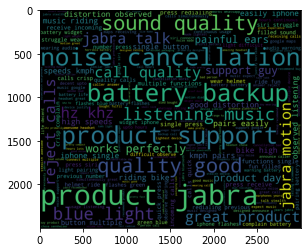

In [60]:
#Now create the wordcloud
from wordcloud import WordCloud
wordcloud_bluetooth = WordCloud(background_color = 'black', width = 3000, height = 2500).generate(bluetooth_rev_str)
plt.imshow(wordcloud_bluetooth)

In [76]:
#Extracting positive words from review
with open ("D:/1.0 Studies/DataScience_Excelr/Assignment18_TextMining/positive-words.txt") as pos:
    positive_words = pos.read().split("\n")
    positive_words = positive_words[36:]

In [77]:
bluetooth_positive = " ".join([w for w in bluetooth_reviews_words if w in positive_words])

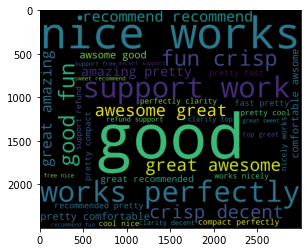

In [90]:
#Positive wordcloud
wordcloud_positive = WordCloud(background_color = 'black', width = 3000, height = 2500).generate(bluetooth_positive)
plt.imshow(wordcloud_positive)

In [87]:
#Extracting negative words from review
with open ("D:/1.0 Studies/DataScience_Excelr/Assignment18_TextMining/negative-words.txt") as neg:
    negative_words=neg.read().split("\n")
    negative_words=negative_words[37:]

In [88]:
bluetooth_negative = " ".join([w for w in bluetooth_reviews_words if w in negative_words])

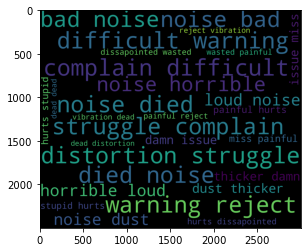

In [89]:
#Negative wordcloud
wordcloud_negative = WordCloud(background_color = 'black', width = 3000, height = 2500).generate(bluetooth_negative)
plt.imshow(wordcloud_negative)